# Dengue Time-Series Forecasting EDA

This notebook is part of the `dengue-time-series-forecasting` project repository by - `hardik-thapar`

It supports the overall goal of building an end-to-end epidemiological forecasting pipeline, starting with structured exploratory data analysis and progressing toward validated time-series modeling.

---

### Dengue Forecasting — Exploratory Data Analysis (EDA)

This notebook explores the DengAI dataset to understand:

- Data structure  
- Target distribution  
- Seasonal patterns  
- Feature relationships  
- Differences between San Juan and Iquitos  

**Objective:** Develop domain intuition and identify modeling directions before building forecasting models.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/datasets/hardikthapar/deng123/DengAI_Training_Data_Features.csv
/kaggle/input/datasets/hardikthapar/deng123/DengAI_Training_Data_Labels.csv
/kaggle/input/datasets/hardikthapar/deng123/DengAI_Test_Data_Features.csv


Purpose: Understanding the problem

Include:
	
 •	Data loading	•	Null value analysis	•	Distribution of target	•	Seasonal visualization	•	Correlation heatmaps	•	City comparison	•	Initial insights


End with:

Observations summary section (written in markdown)


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 1. Data Loading

The dataset contains:
- Climate variables
- Vegetation indices
- Weekly dengue case counts
- Two cities: San Juan (sj) and Iquitos (iq)

Data is indexed by:
(city, year, weekofyear)

In [3]:
X = pd.read_csv(
    "/kaggle/input/datasets/hardikthapar/deng123/DengAI_Training_Data_Features.csv",
    index_col=[0, 1, 2]
)

y = pd.read_csv(
    "/kaggle/input/datasets/hardikthapar/deng123/DengAI_Training_Data_Labels.csv",
    index_col=[0, 1, 2]
)

X=X.join(y['total_cases'])
# Separate cities
sj_X = X.loc["sj"].copy()
iq_X = X.loc["iq"].copy()



In [4]:

print(f'Dstaset shape : {X.shape}')
print(X.head(5))

Dstaset shape : (1456, 22)
                     week_start_date   ndvi_ne   ndvi_nw   ndvi_se   ndvi_sw  \
city year weekofyear                                                           
sj   1990 18              1990-04-30  0.122600  0.103725  0.198483  0.177617   
          19              1990-05-07  0.169900  0.142175  0.162357  0.155486   
          20              1990-05-14  0.032250  0.172967  0.157200  0.170843   
          21              1990-05-21  0.128633  0.245067  0.227557  0.235886   
          22              1990-05-28  0.196200  0.262200  0.251200  0.247340   

                      precipitation_amt_mm  reanalysis_air_temp_k  \
city year weekofyear                                                
sj   1990 18                         12.42             297.572857   
          19                         22.82             298.211429   
          20                         34.54             298.781429   
          21                         15.36             298.987143  

## 2. Data Structure & Overview

We inspect:
- Feature types
- Missing values
- Basic statistics

In [5]:
print(X.info())
print()
print(X.describe())

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1456 entries, ('sj', np.int64(1990), np.int64(18)) to ('iq', np.int64(2010), np.int64(25))
Data columns (total 22 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   week_start_date                        1456 non-null   object 
 1   ndvi_ne                                1262 non-null   float64
 2   ndvi_nw                                1404 non-null   float64
 3   ndvi_se                                1434 non-null   float64
 4   ndvi_sw                                1434 non-null   float64
 5   precipitation_amt_mm                   1443 non-null   float64
 6   reanalysis_air_temp_k                  1446 non-null   float64
 7   reanalysis_avg_temp_k                  1446 non-null   float64
 8   reanalysis_dew_point_temp_k            1446 non-null   float64
 9   reanalysis_max_air_temp_k              1446 non-null   float64
 10  reana

## 3. Missing Value Analysis

Since this is climate time-series data, missing values are expected.
We evaluate:
- Which columns contain missing values
- Their proportion
- Whether patterns are systematic

In [6]:
print('Null values feature-wise:')
print(X.isna().sum())

Null values feature-wise:
week_start_date                            0
ndvi_ne                                  194
ndvi_nw                                   52
ndvi_se                                   22
ndvi_sw                                   22
precipitation_amt_mm                      13
reanalysis_air_temp_k                     10
reanalysis_avg_temp_k                     10
reanalysis_dew_point_temp_k               10
reanalysis_max_air_temp_k                 10
reanalysis_min_air_temp_k                 10
reanalysis_precip_amt_kg_per_m2           10
reanalysis_relative_humidity_percent      10
reanalysis_sat_precip_amt_mm              13
reanalysis_specific_humidity_g_per_kg     10
reanalysis_tdtr_k                         10
station_avg_temp_c                        43
station_diur_temp_rng_c                   43
station_max_temp_c                        20
station_min_temp_c                        14
station_precip_mm                         22
total_cases                  

## 4. Target Variable Distribution

The target variable `total_cases` represents weekly dengue cases.

We examine:
- Distribution shape
- Mean vs variance
- Differences across cities

Mean: 34.18055555555556
Variance: 2640.045439691045


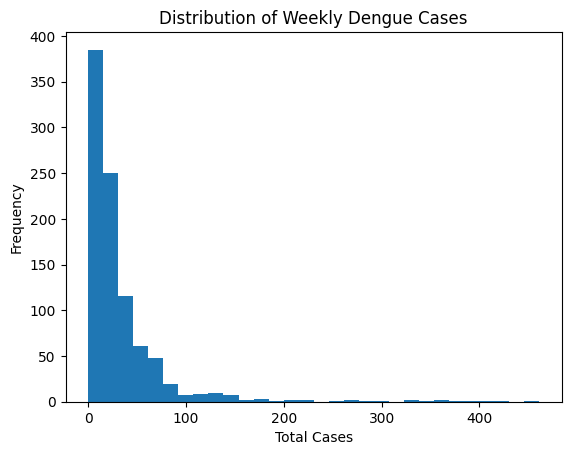

In [7]:
print("Mean:",sj_X['total_cases'].mean())
print("Variance:",sj_X['total_cases'].var())

plt.figure()
plt.hist(sj_X['total_cases'], bins=30)
plt.xlabel("Total Cases")
plt.ylabel("Frequency")
plt.title("Distribution of Weekly Dengue Cases")
plt.show()



### Interpretation:
- Result	Meaning

- Var >> Mean	Overdispersed (very common)

- In dengue data: Usually variance >> mean → overdispersed counts.

## 5. Seasonal Patterns

Dengue transmission is climate-driven and likely seasonal.

We visualize:
- Weekly dengue cases over time
- Seasonal cycles across years
- Differences between San Juan and Iquitos

Goal:
Understand outbreak timing and recurrence.

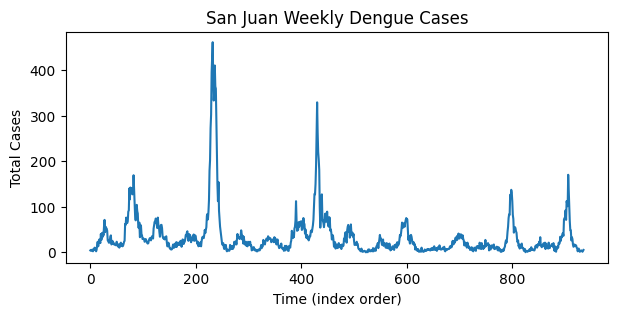

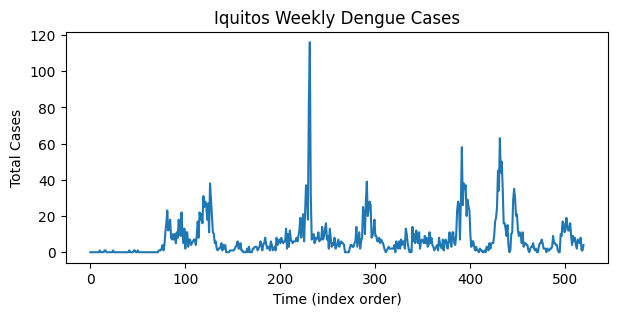

In [8]:
plt.figure(figsize=(7,3))
plt.plot(sj_X["total_cases"].values)
plt.title("San Juan Weekly Dengue Cases")
plt.xlabel("Time (index order)")
plt.ylabel("Total Cases")
plt.show()
plt.figure(figsize=(7,3))
plt.plot(iq_X["total_cases"].values)
plt.title("Iquitos Weekly Dengue Cases")
plt.xlabel("Time (index order)")
plt.ylabel("Total Cases")
plt.show()

## 6. Correlation Analysis

We compute correlation between:
- Climate variables
- Target variable

Goal:
Identify linear relationships and multicollinearity.

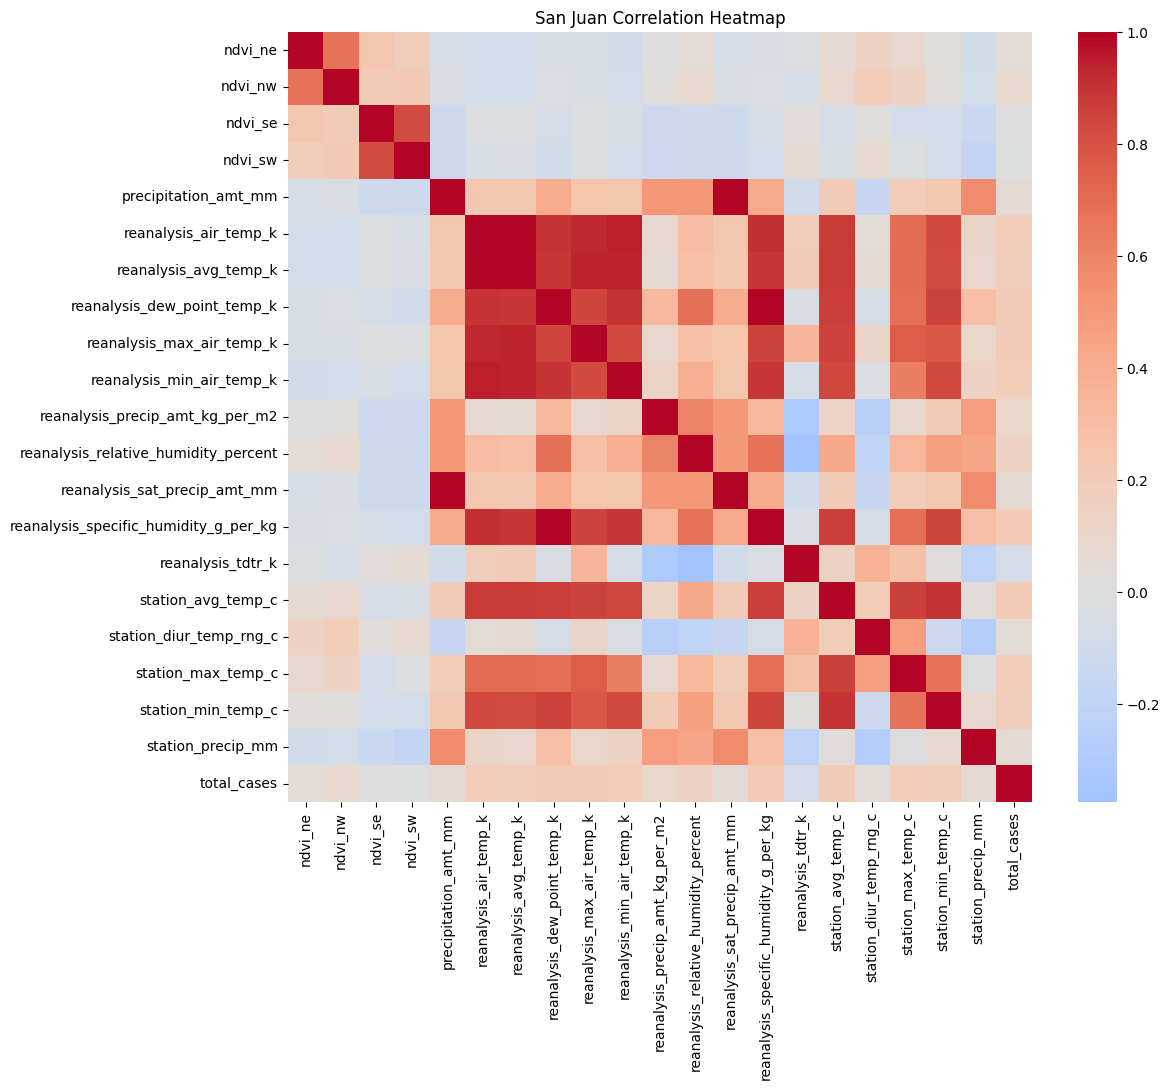

In [9]:
categorical_cols = sj_X.select_dtypes(include=['object', 'category']).columns
df_numeric = sj_X.drop(columns=categorical_cols, axis=1)

sj_corr = df_numeric.corr()

plt.figure(figsize=(12,10))
sns.heatmap(sj_corr, cmap="coolwarm", center=0)
plt.title("San Juan Correlation Heatmap")
plt.show()

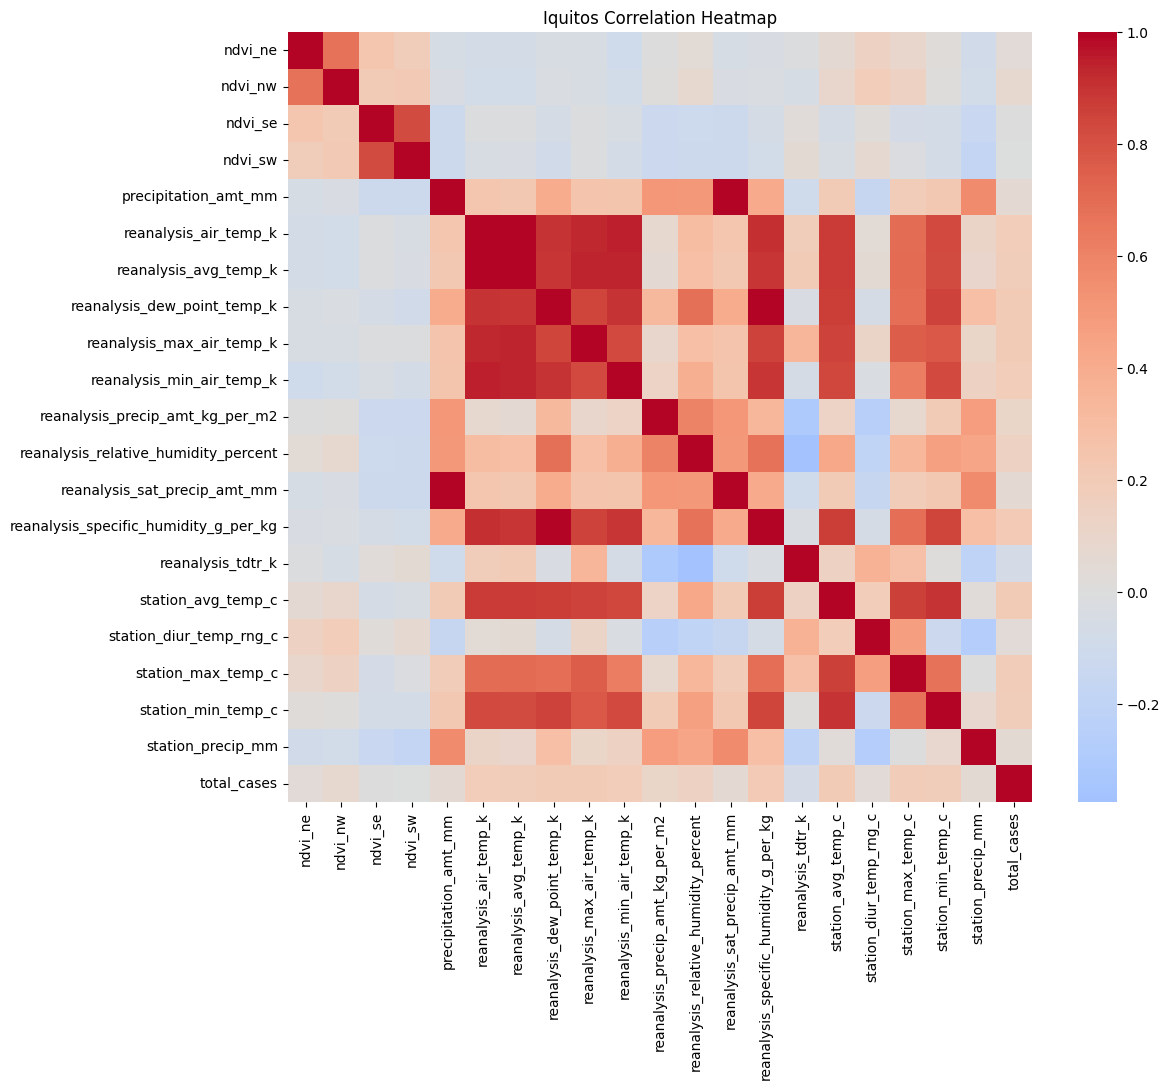

In [10]:
categorical_cols = sj_X.select_dtypes(include=['object', 'category']).columns
df_numeric = sj_X.drop(columns=categorical_cols, axis=1)

iq_corr = df_numeric.corr()

plt.figure(figsize=(12,10))
sns.heatmap(iq_corr, cmap="coolwarm", center=0)
plt.title("Iquitos Correlation Heatmap")
plt.show()

In [11]:
print("Top correlations - San Juan")
print(sj_corr["total_cases"].sort_values(ascending=False))

print("\nTop correlations - Iquitos")
print(iq_corr["total_cases"].sort_values(ascending=False))

Top correlations - San Juan
total_cases                              1.000000
reanalysis_specific_humidity_g_per_kg    0.207947
reanalysis_dew_point_temp_k              0.203774
station_avg_temp_c                       0.196617
reanalysis_max_air_temp_k                0.194532
station_max_temp_c                       0.189901
reanalysis_min_air_temp_k                0.187943
reanalysis_air_temp_k                    0.181917
station_min_temp_c                       0.177012
reanalysis_avg_temp_k                    0.175267
reanalysis_relative_humidity_percent     0.144045
reanalysis_precip_amt_kg_per_m2          0.107457
ndvi_nw                                  0.075307
reanalysis_sat_precip_amt_mm             0.060211
precipitation_amt_mm                     0.060211
station_precip_mm                        0.051759
ndvi_ne                                  0.037639
station_diur_temp_rng_c                  0.034630
ndvi_se                                  0.001113
ndvi_sw               

## Observations Summary

1. Target Distribution
   - San Juan exhibits significantly higher mean and variance.
   - Distribution is highly skewed with outbreak spikes.

2. Seasonality
   - Clear recurring seasonal patterns are visible.
   - Outbreak spikes tend to cluster within specific yearly windows.

3. Climate Correlation
   - Humidity and dew point temperature show the strongest correlation with dengue cases.
   - Temperature variables are highly correlated with each other.
   - Precipitation shows weaker direct correlation than expected.

4. Time Dependence
   - Dengue cases appear autocorrelated.
   - Previous week’s outbreak strongly influences the current week.

5. City Differences
   - San Juan shows higher volatility.
   - Iquitos shows lower magnitude outbreaks.

Conclusion:
The dataset exhibits strong temporal structure and overdispersion, indicating that time-aware modeling approaches will be necessary.